In [6]:
#Author : Sateesh K
#Date   : 27/Apr/2020
#Purpose: Abelone gender prediction.
#   Name		Data Type	Meas.	Description
#	----		---------	-----	-----------
#	Sex		nominal			M, F, and I (infant) ==== Indepedent variable.
#	Length		continuous	mm	Longest shell measurement
#	Diameter	continuous	mm	perpendicular to length
#	Height		continuous	mm	with meat in shell
#	Whole weight	continuous	grams	whole abalone
#	Shucked weight	continuous	grams	weight of meat
#	Viscera weight	continuous	grams	gut weight (after bleeding)
#	Shell weight	continuous	grams	after being dried
#	Rings		integer			+1.5 gives the age in years


In [7]:
#Load the data into a Pandas data structure
import pandas as pd
import os
print(os.getcwd())

C:\Users\SK00642740\SateeshK\src\py_utils


In [8]:
#Copy the file to current cwd
from shutil import copyfile
copyfile('C:\\Users\\SK00642740\\iCloudDrive\\School\\AI\\Week9_Logistic_Regression\\abalone.csv',os.getcwd() + '\\' + 'abalone.csv')
df = pd.read_csv('abalone.csv')

In [9]:
df.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Sex              4177 non-null   object 
 1   Length           4177 non-null   float64
 2   Diameter         4177 non-null   float64
 3   Height           4177 non-null   float64
 4   Whole weight     4177 non-null   float64
 5   Shucked weight   4177 non-null   float64
 6   Viscera weight   4177 non-null   float64
 7   Shell weight     4177 non-null   float64
 8   Rings            4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [11]:
#Collect stats on total missing values across all features.
print(df.isnull().sum())

Sex                0
Length             0
Diameter           0
Height             0
Whole weight       0
Shucked weight     0
Viscera weight     0
Shell weight       0
Rings              0
dtype: int64


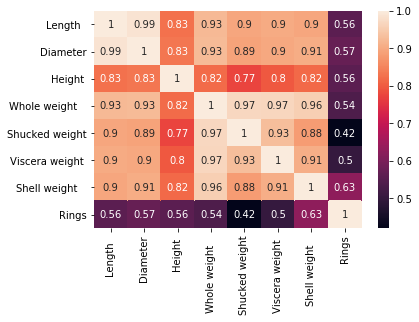

In [12]:
#Visually take a look at co-relations among variables
import seaborn as sns
corr = df.corr()
sns.heatmap(corr, annot=True)


In [13]:
#Take a look at the data
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


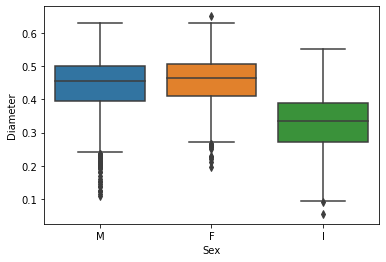

In [14]:
#Based on high co-relation watch closely relationship between each of these with outcome variable which is sex.
%matplotlib inline
import matplotlib.pyplot as plt
sns.boxplot(x='Sex', y='Diameter', data=df)
plt.show()

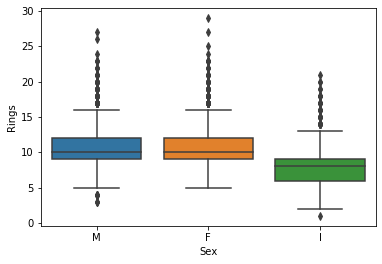

In [15]:
%matplotlib inline
import matplotlib.pyplot as plt
sns.boxplot(x='Sex', y='Rings', data=df)
plt.show()

In [16]:
#%matplotlib inline
#import matplotlib.pyplot as plt
#sns.boxplot(x='Sex', y='Length', data=df)
#plt.show()

In [17]:
#Remove all rows whose Sex value is I, this is because I represents Infant and this can neither be used for training or testing.
new_df = df[df.Sex != 'I']
print(new_df)

     Sex  Length    Diameter  Height   Whole weight     Shucked weight  \
0      M     0.455     0.365    0.095           0.5140          0.2245   
1      M     0.350     0.265    0.090           0.2255          0.0995   
2      F     0.530     0.420    0.135           0.6770          0.2565   
3      M     0.440     0.365    0.125           0.5160          0.2155   
6      F     0.530     0.415    0.150           0.7775          0.2370   
...   ..       ...       ...      ...              ...             ...   
4172   F     0.565     0.450    0.165           0.8870          0.3700   
4173   M     0.590     0.440    0.135           0.9660          0.4390   
4174   M     0.600     0.475    0.205           1.1760          0.5255   
4175   F     0.625     0.485    0.150           1.0945          0.5310   
4176   M     0.710     0.555    0.195           1.9485          0.9455   

      Viscera weight   Shell weight     Rings  
0              0.1010           0.1500     15  
1              

In [18]:
#There is only one categorical variable, do a one-hot encoding.
#Select the variables to be one-hot encoded
one_hot_features = ['Sex']
# Convert categorical variables into dummy/indicator variables (i.e. one-hot encoding).
one_hot_encoded = pd.get_dummies(new_df[one_hot_features],drop_first=True)
one_hot_encoded.info(verbose=True, memory_usage=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2835 entries, 0 to 4176
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Sex_M   2835 non-null   uint8
dtypes: uint8(1)
memory usage: 24.9 KB


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Sex              4177 non-null   object 
 1   Length           4177 non-null   float64
 2   Diameter         4177 non-null   float64
 3   Height           4177 non-null   float64
 4   Whole weight     4177 non-null   float64
 5   Shucked weight   4177 non-null   float64
 6   Viscera weight   4177 non-null   float64
 7   Shell weight     4177 non-null   float64
 8   Rings            4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [20]:
one_hot_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2835 entries, 0 to 4176
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Sex_M   2835 non-null   uint8
dtypes: uint8(1)
memory usage: 24.9 KB


In [21]:
# Replacing categorical columns with dummies
fdf = new_df.drop(one_hot_features,axis=1)
fdf = pd.concat([fdf, one_hot_encoded] ,axis=1)
fdf.head()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Sex_M
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,1
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,1
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,0
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,1
6,0.530,0.415,0.150,0.7775,0.2370,0.1415,0.330,20,0


In [23]:
#Do a Pandas profiling to check if the varibales need to be standardized.
#import pandas_profiling
import pandas as pd
#report = pandas_profiling.ProfileReport(df)
#pd.show_versions()
#report.to_file("abelone_profile.html")

#As Pandas profiling is not working manually plot the variables to check if they are normally distributed or not.
print(fdf.columns)
#By looking at the above outputs it is clear there are hidden white spaces.
fdf = fdf.rename(columns={'Length': 'Length'})
fdf = fdf.rename(columns={'Heigth': 'Height'})
fdf = fdf.rename(columns={'Whole weight': 'WholeWeight'})
fdf = fdf.rename(columns={'Shucked weight': 'ShuckedWeight'})
fdf = fdf.rename(columns={'Viscera weight': 'VisceraWeight'})
fdf = fdf.rename(columns={'Shell weight': 'ShellWeight'})
print(fdf.columns)

import seaborn as sns
sns.distplot(fdf.Length)  #Not sure why fdf.Length does not work !
sns.distplot(fdf.Diameter)
sns.distplot(fdf.Height)
sns.distplot(fdf.WholeWeight)
sns.distplot(fdf.ShuckedWeight)
sns.distplot(fdf.VisceraWeight)
sns.distplot(fdf.ShellWeight)

Index(['Length  ', 'Diameter', 'Height ', 'Whole weight   ', 'Shucked weight',
       'Viscera weight ', 'Shell weight   ', 'Rings', 'Sex_M'],
      dtype='object')
Index(['Length  ', 'Diameter', 'Height ', 'Whole weight   ', 'ShuckedWeight',
       'Viscera weight ', 'Shell weight   ', 'Rings', 'Sex_M'],
      dtype='object')


AttributeError: 'DataFrame' object has no attribute 'Length'

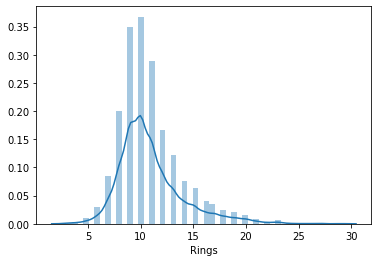

In [24]:
#Plot rings seperately as it makes the previous graph look not legible.
sns.distplot(fdf.Rings)

In [25]:
#Now start to build the dependent and independent variables list
X = fdf.drop(['Sex_M'],axis=1)
y = fdf['Sex_M']

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)

# Scale and center the data
fdf_normalized = scaler.transform(X)

# Create a pandas DataFrame of independent variables.
fdf_normalized = pd.DataFrame(data=fdf_normalized, index=X.index, columns=X.columns)


## ToDo: Create a function to put all the plotting into one method.

In [26]:
#Now plot to verify how the normalized values look
import seaborn as sns
#Need to build a fucntion here, but for now
#sns.distplot(fdf_normalized.iloc[:,0])  #Not sure why fdf.Length does not work !
#sns.distplot(fdf_normalized.Diameter)
#sns.distplot(fdf_normalized.iloc[:,2])
#sns.distplot(fdf_normalized.iloc[:,3])
#sns.distplot(fdf_normalized.iloc[:,4])
#sns.distplot(fdf_normalized.iloc[:,5])
#sns.distplot(fdf_normalized.iloc[:,6])

sns.distplot(fdf.Length)  #Not sure why fdf.Length does not work !
sns.distplot(fdf.Diameter)
sns.distplot(fdf.Height)
sns.distplot(fdf.WholeWeight)
sns.distplot(fdf.ShuckedWeight)
sns.distplot(fdf.VisceraWeight)
sns.distplot(fdf.ShellWeight)


AttributeError: 'DataFrame' object has no attribute 'Length'

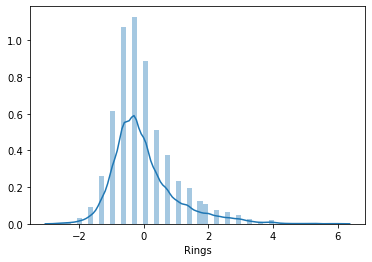

In [27]:
# This variable needs to be outside
sns.distplot(fdf_normalized.Rings)

# The normalized cells and unnormalized cells look the same, please clarify. I was expecting the rings variable after normalizing to be between -3 to +3

In [28]:
#Split the data into training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(fdf_normalized,y,random_state=1234,test_size=0.3)
print(X_train.head())
y_train


      Length    Diameter   Height   Whole weight     ShuckedWeight  \
1109 -0.517224 -0.588655 -0.252237        -0.530411      -0.407958   
1139  0.056866  0.299261  0.282311        -0.326279      -0.019093   
327  -0.621604 -0.588655 -0.653147        -0.823920      -0.796824   
4144  1.048476  1.123754  0.950495         1.439190       1.449167   
596  -0.204084 -0.208120 -0.385874        -0.669442      -0.860456   

      Viscera weight   Shell weight        Rings  
1109        -0.373310        -0.824522 -0.619440  
1139        -0.250596        -0.413070 -0.619440  
327         -0.550019        -0.669257  0.358169  
4144         0.696760         1.683005  0.032300  
596         -0.358584        -0.513992 -0.619440  


1109    1
1139    0
327     1
4144    1
596     0
       ..
4020    0
2998    0
858     0
1955    0
973     1
Name: Sex_M, Length: 1984, dtype: uint8

In [29]:
# Train the model
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(C=1)                            # Set Large C value for low regularization to prevent overfitting
logreg.fit(X_train, y_train)

print(logreg.coef_)                                            # Coefficients for Logistic Regression
print(logreg.intercept_)
#The logreg is an mathematical representation of the co-effecients of a linear equation.
# y = Ax1 + Bx2 + Cx3 .... + Z

[[-0.15988037 -0.37838825 -0.16117002  0.01734874  0.5161263  -0.27717367
   0.25439882 -0.05163928]]
[0.1594996]


In [30]:
#Test the model
y_pred_test = logreg.predict(X_test)  #This is data predicted by the model with test data (Data reserved for checking accuracy of the model)
y_pred_train = logreg.predict(X_train) #This is the predcited values for training set itself, so here we can compare y_pred_train with y_test

In [31]:
#Accuracy of the model
from sklearn import metrics
# comparing the metrics of predicted lebel and real label of test data
print("Test Accuracy: ", metrics.accuracy_score(y_test, y_pred_test))

#MODEL PREDICTIONS VS. TEST DATA VALUES.

Test Accuracy:  0.5605170387779084


In [32]:
# comparing the metrics of predicted lebel and real label of test data
print("Train Accuracy: ", metrics.accuracy_score(y_train, y_pred_train))

#MODEL PREDICTIONS VS. EXISTING TRAINING DATA-SET

Train Accuracy:  0.5665322580645161


In [33]:
# Null accuracy
# Actual Values of y_test
y_test.value_counts()
y_test.value_counts().head(1) / len(y_test)

1    0.544066
Name: Sex_M, dtype: float64

In [35]:
#Print the confusion matrix so that this can be compared with DT
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_test)
print(cm)

[[136 252]
 [122 341]]
